In [1]:
import streamlit as st
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [2]:
consumerKey = "SCXJOdWHrc9zWEFHf1Ha7kmc1"
consumerSecret = "72QzzKBXBTCFb0Po2Np4yNUrZ7yEHImlfxLyQxcCL3QV8S3CPN"
accessToken = "1270624123329208320-g6dwbbOVoEPAqDJRpJrfg1smboKJ33"
accessTokenSecret = "s2ee7pvNL7XUePYEilI30hA3izU6YLj3pDSSWXYqZHOZ8"

In [3]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [4]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="ArvindKejriwal", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) चुनाव प्रचार के दौरान बाराबंकी में जनसभा | LIVE https://t.co/7igulmT2Ks

2) Addressing a public meeting in Lucknow | LIVE  https://t.co/EZe8eRV5ba

3) RT @BhagwantMann: इतनी बड़ी तादाद में वोट करके पंजाब के 3 करोड़ लोग शहीद-ए-आज़म भगत सिंह के संघर्ष और बाबा साहिब अम्बेडकर के लिखे हुए संवि…

4) पंजाब के भविष्य के लिए वोट डालने ज़रूर जाएं। ऐसा भविष्य, जिसमें अच्छे स्कूल हों, आपके बच्चों को अच्छा रोज़गार मिले, अच्छे सरकारी अस्पताल हों जिनमें आपका मुफ़्त इलाज हो, नशा ख़त्म हो, सभी पंजाबी सुरक्षित महसूस करें, देश की सुरक्षा सर्वोपरि हो। ये सब होगा, जब आप वोट डालने जाएँगे https://t.co/Qnh9t32KZl

5) RT @BhagwantMann: ਬਾਬਾ ਸਾਹਿਬ ਅਤੇ ਭਗਤ ਸਿੰਘ ਜੀ ਦੇ ਸੁਪਨਿਆਂ ਦੇ ਪੰਜਾਬ ਨੂੰ ਧਿਆਨ ਵਿੱਚ ਰੱਖਦੇ ਹੋਏ ਆਪਣੀ ਵੋਟ ਪਾਈ...ਪੰਜਾਬ ਦੇ ਸੁਨਹਿਰੇ ਭਵਿੱਖ ਲਈ ਤੁਸੀਂ ਵੀ…



In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,चुनाव प्रचार के दौरान बाराबंकी में जनसभा | LIV...
1,Addressing a public meeting in Lucknow | LIVE ...
2,RT @BhagwantMann: इतनी बड़ी तादाद में वोट करके...
3,पंजाब के भविष्य के लिए वोट डालने ज़रूर जाएं। ऐ...
4,RT @BhagwantMann: ਬਾਬਾ ਸਾਹਿਬ ਅਤੇ ਭਗਤ ਸਿੰਘ ਜੀ ਦ...


In [6]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,चुनाव प्रचार के दौरान बाराबंकी में जनसभा | LIVE
1,Addressing a public meeting in Lucknow | LIVE
2,: इतनी बड़ी तादाद में वोट करके पंजाब के 3 करोड...
3,पंजाब के भविष्य के लिए वोट डालने ज़रूर जाएं। ऐ...
4,: ਬਾਬਾ ਸਾਹਿਬ ਅਤੇ ਭਗਤ ਸਿੰਘ ਜੀ ਦੇ ਸੁਪਨਿਆਂ ਦੇ ਪੰਜ...
...,...
95,: Must Watch 🔥🔥
96,ਪੰਜਾਬ ਦੇ ਨੌਜਵਾਨਾਂ ਲਈ ਮੇਰਾ ਸੰਦੇਸ਼ ।
97,सभी देशवासियों को बसंत पंचमी की हार्दिक शुभकाम...
98,1: Mood of Punjab ( Patiala ) \n😍😍😍😍😍😍😍\nPart_1


In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,चुनाव प्रचार के दौरान बाराबंकी में जनसभा | LIVE,0.500000,0.136364
1,Addressing a public meeting in Lucknow | LIVE,0.283333,0.068182
2,: इतनी बड़ी तादाद में वोट करके पंजाब के 3 करोड...,0.000000,0.000000
3,पंजाब के भविष्य के लिए वोट डालने ज़रूर जाएं। ऐ...,0.000000,0.000000
4,: ਬਾਬਾ ਸਾਹਿਬ ਅਤੇ ਭਗਤ ਸਿੰਘ ਜੀ ਦੇ ਸੁਪਨਿਆਂ ਦੇ ਪੰਜ...,0.000000,0.000000
...,...,...,...
95,: Must Watch 🔥🔥,0.000000,0.000000
96,ਪੰਜਾਬ ਦੇ ਨੌਜਵਾਨਾਂ ਲਈ ਮੇਰਾ ਸੰਦੇਸ਼ ।,0.000000,0.000000
97,सभी देशवासियों को बसंत पंचमी की हार्दिक शुभकाम...,0.000000,0.000000
98,1: Mood of Punjab ( Patiala ) \n😍😍😍😍😍😍😍\nPart_1,0.000000,0.000000


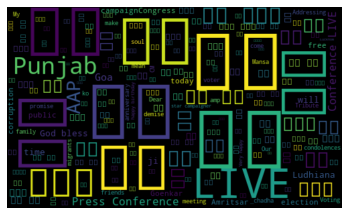

In [11]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=120).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
  
    
  
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df


,Tweets,Subjectivity,Polarity,Analysis
0,चुनाव प्रचार के दौरान बाराबंकी में जनसभा | LIVE,0.500000,0.136364,Positive
1,Addressing a public meeting in Lucknow | LIVE,0.283333,0.068182,Positive
2,: इतनी बड़ी तादाद में वोट करके पंजाब के 3 करोड...,0.000000,0.000000,Neutral
3,पंजाब के भविष्य के लिए वोट डालने ज़रूर जाएं। ऐ...,0.000000,0.000000,Neutral
4,: ਬਾਬਾ ਸਾਹਿਬ ਅਤੇ ਭਗਤ ਸਿੰਘ ਜੀ ਦੇ ਸੁਪਨਿਆਂ ਦੇ ਪੰਜ...,0.000000,0.000000,Neutral
...,...,...,...,...
95,: Must Watch 🔥🔥,0.000000,0.000000,Neutral
96,ਪੰਜਾਬ ਦੇ ਨੌਜਵਾਨਾਂ ਲਈ ਮੇਰਾ ਸੰਦੇਸ਼ ।,0.000000,0.000000,Neutral
97,सभी देशवासियों को बसंत पंचमी की हार्दिक शुभकाम...,0.000000,0.000000,Neutral
98,1: Mood of Punjab ( Patiala ) \n😍😍😍😍😍😍😍\nPart_1,0.000000,0.000000,Neutral


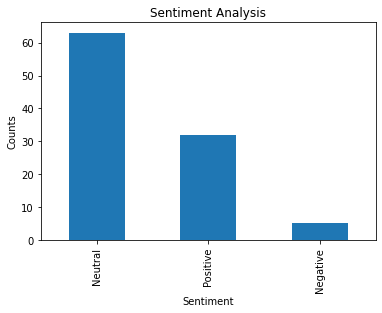

In [13]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()